In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
import os

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
zip_PATH = "/content/drive/MyDrive/train_data.zip"
save_PATH = "/content/drive/MyDrive/mobile_net_v2_1.h5"
load_PATH = '/content/train_data'
!unzip -q "/content/drive/MyDrive/train_data.zip"

In [7]:
img_gen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    validation_split=0.2
)

In [8]:
BATCH_SIZE = 40

train_ds = img_gen.flow_from_directory(directory = load_PATH , batch_size = BATCH_SIZE ,
                                       shuffle = True , class_mode = 'sparse' ,
                                       target_size = (299,299) , subset = 'training' , seed = 42)
val_ds = img_gen.flow_from_directory(directory = load_PATH , batch_size = BATCH_SIZE ,
                                     shuffle = False  , class_mode = 'sparse' ,
                                     target_size = (299,299) , subset = 'validation', seed = 42)

Found 7994 images belonging to 10 classes.
Found 1996 images belonging to 10 classes.


In [9]:
from keras.src.saving.saving_lib import optimizer
from keras.applications.mobilenet_v2 import MobileNetV2

num_classes = 10
base_model_1 = MobileNetV2(weights='imagenet' , include_top = False)
x = base_model_1.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(1024, activation='relu')(x)
predictions = keras.layers.Dense(num_classes, activation='softmax')(x)
model_1 = keras.Model(inputs=base_model_1.input, outputs=predictions)
model_1.compile(loss = 'sparse_categorical_crossentropy' ,
                     optimizer = 'sgd' , metrics = ['accuracy'])
for layer in model_1.layers[:100] :
  layer.trainable = False
for layer in model_1.layers[100:] :
  layer.trainable = True
check_inc_res = keras.callbacks.ModelCheckpoint(save_PATH, monitor='val_accuracy', save_best_only=False)

9406464/9406464 [==============================] - 0s 0us/step


In [10]:
history = model_1.fit(train_ds , validation_data = val_ds , epochs = 30 , callbacks=[check_inc_res] )

Epoch 1/30
200/200 [==============================] - ETA: 0s - loss: 1.7033 - accuracy: 0.4258

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


200/200 [==============================] - 101s 366ms/step - loss: 1.7033 - accuracy: 0.4258 - val_loss: 1.8048 - val_accuracy: 0.3737
Epoch 2/30
200/200 [==============================] - 68s 341ms/step - loss: 1.2161 - accuracy: 0.6003 - val_loss: 1.7096 - val_accuracy: 0.4118
Epoch 3/30
200/200 [==============================] - 68s 341ms/step - loss: 0.9523 - accuracy: 0.6859 - val_loss: 1.6334 - val_accuracy: 0.4539
Epoch 4/30
200/200 [==============================] - 69s 344ms/step - loss: 0.7294 - accuracy: 0.7685 - val_loss: 1.5978 - val_accuracy: 0.4955
Epoch 5/30
200/200 [==============================] - 69s 343ms/step - loss: 0.5421 - accuracy: 0.8302 - val_loss: 1.6966 - val_accuracy: 0.4499
Epoch 6/30
200/200 [==============================] - 70s 348ms/step - loss: 0.3898 - accuracy: 0.8889 - val_loss: 1.5655 - val_accuracy: 0.5020
Epoch 7/30
200/200 [==============================] - 69s 346ms/step - loss: 0.2720 - accuracy: 0.9267 - val_loss: 1.6398 - val_accuracy: 0.

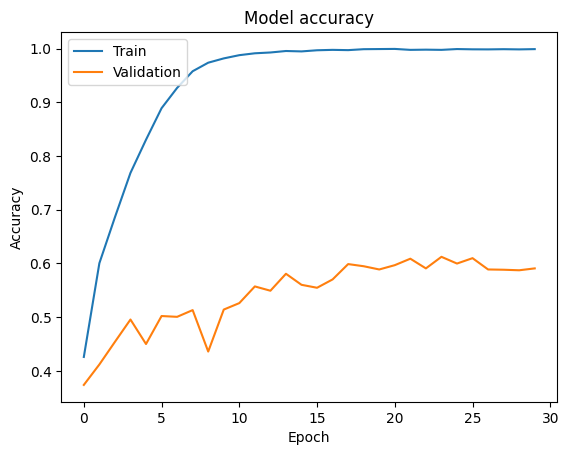

In [11]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
